Optimización de un portafolio

❤️ Created by Vivian

In [ ]:
!pip install pandas
!pip install pulp
!pip install pandas_datareader 
!pip install scipy
!pip install yfinance
!pip install PyPortfolioOpt

import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
from pulp import *
import pypfopt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Descargar datos de Yahoo! finance
#Tickers 
TSLA=yf.Ticker("TSLA")
TSLA
TSLA.info
print(TSLA.info)
stockinfo=TSLA.info
for line in stockinfo.items():
  print(":", line)


{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its company-owned s

In [ ]:
  marketCap=TSLA.info["marketCap"] ###Buscamos el market cap
  print(marketCap)

612252319744


In [ ]:
print(TSLA.actions)

                           Dividends  Stock Splits
Date                                              
2020-08-31 00:00:00-04:00        0.0           5.0
2022-08-25 00:00:00-04:00        0.0           3.0


In [ ]:
data=TSLA.history(period="max") ###accediendo a datos históricos
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-22 00:00:00-04:00,180.699997,189.320007,180.110001,188.869995,132001400,0.0,0.0
2023-05-23 00:00:00-04:00,186.199997,192.960007,185.259995,185.770004,156952100,0.0,0.0
2023-05-24 00:00:00-04:00,182.229996,184.220001,178.220001,182.899994,137605100,0.0,0.0


In [ ]:
data=TSLA.history(start="2022-1-1", end="2023-1-1") 
print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  382.583344  400.356659  378.679993  399.926666   
2022-01-04 00:00:00-05:00  396.516663  402.666656  374.350006  383.196655   
2022-01-05 00:00:00-05:00  382.216675  390.113342  360.336670  362.706665   
2022-01-06 00:00:00-05:00  359.000000  362.666656  340.166656  354.899994   
2022-01-07 00:00:00-05:00  360.123322  360.309998  336.666656  342.320007   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  126.370003  128.619995  121.019997  123.150002   
2022-12-27 00:00:00-05:00  117.500000  119.669998  108.760002  109.099998   
2022-12-28 00:00:00-05:00  110.349998  116.269997  108.239998  112.709999   
2022-12-29 00:00:00-05:00  120.389999  123.570000  117.500000  121.820000   
2022-12-30 00:00:00-05:00  119.949997  124.480003  119.750000  123.180000   

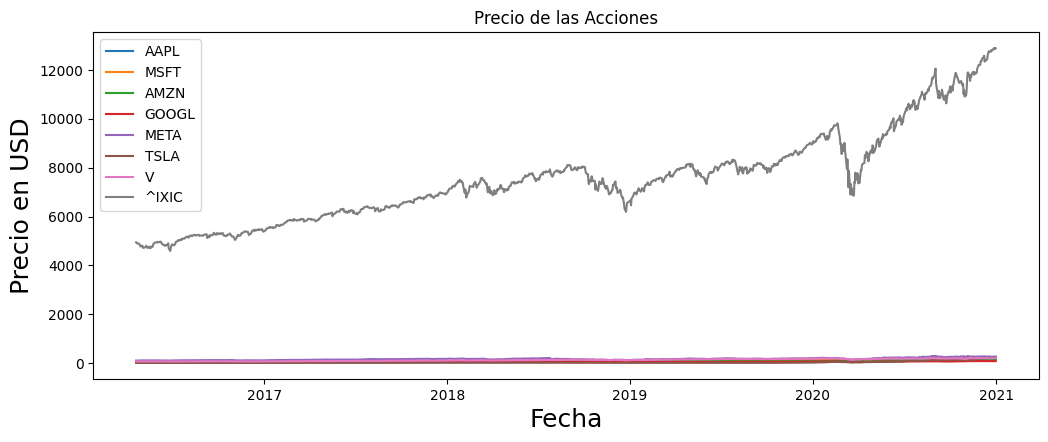

In [ ]:
tickers = ["AAPL", "MSFT" ,"AMZN", "GOOGL", "META","TSLA", "V", "^IXIC" ]
df = pd.DataFrame()

for ticker in tickers:
    df[ticker] = yf.Ticker(ticker).history(start="2016-04-20", end="2021-01-01").Close

plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()


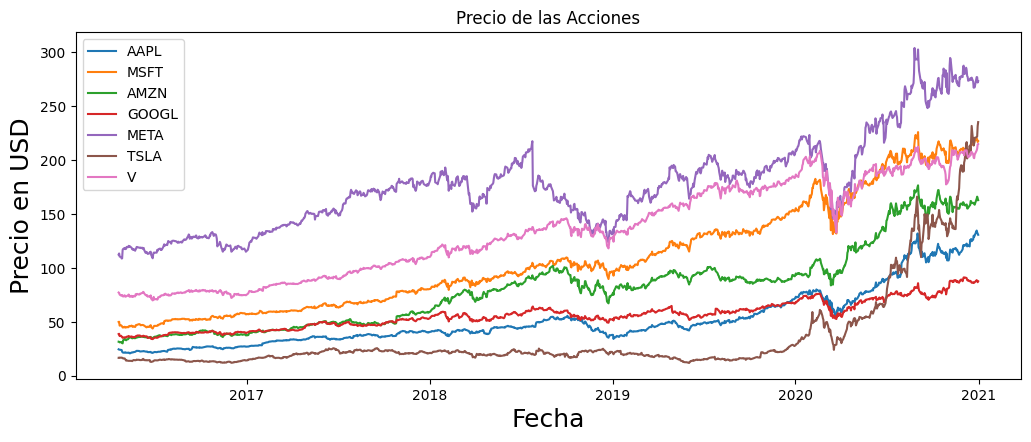

In [ ]:
tickers = ["AAPL", "MSFT" ,"AMZN", "GOOGL", "META","TSLA", "V" ]
df1 = pd.DataFrame()

for ticker in tickers:
    df1[ticker] = yf.Ticker(ticker).history(start="2016-04-20", end="2021-01-01").Close

plt.figure(figsize=(12.2,4.5)) 
for i in df1.columns.values:
    plt.plot( df1[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
returns = ((df/df.shift(1))-1)
log_returns = np.log(1 + df.pct_change())
print(returns)
print(log_returns)

                               AAPL      MSFT      AMZN     GOOGL      META  \
Date                                                                          
2016-04-20 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2016-04-21 00:00:00-04:00 -0.010828  0.003418 -0.003144  0.006556  0.009073   
2016-04-22 00:00:00-04:00 -0.002737 -0.071710 -0.016640 -0.054141 -0.025388   
2016-04-25 00:00:00-04:00 -0.005677  0.006373  0.009186  0.006018 -0.004161   
2016-04-26 00:00:00-04:00 -0.006947 -0.012857 -0.014883 -0.022689 -0.012171   
...                             ...       ...       ...       ...       ...   
2020-12-24 00:00:00-05:00  0.007712  0.007827 -0.003949  0.003431 -0.002648   
2020-12-28 00:00:00-05:00  0.035766  0.009921  0.035071  0.022951  0.035901   
2020-12-29 00:00:00-05:00 -0.013315 -0.003601  0.011584 -0.009132 -0.000794   
2020-12-30 00:00:00-05:00 -0.008527 -0.011019 -0.010882 -0.012237 -0.017740   
2020-12-31 00:00:00-05:00 -0.007703  0.003338 -0.008

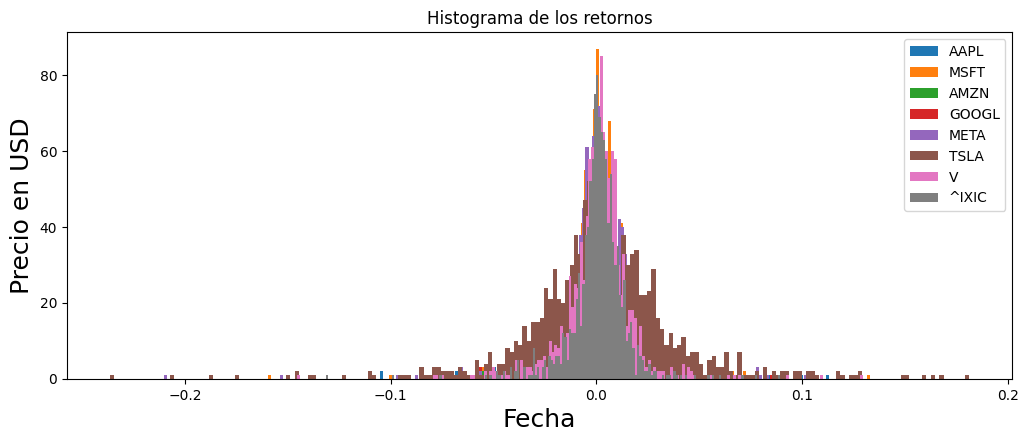

In [ ]:
plt.figure(figsize=(12.2,4.5)) 
for i in log_returns.columns.values:
    plt.hist( log_returns[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(log_returns.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

Debemos crear un portafolio arbitrario que después optimizaremos. Para esto, definiremos pesos iguales para todos los activos. Para calcular los pesos iguales de forma sencilla, utilicé la siguiente función que me crea un vector de precios iguales para todos los activos.

**CAPM**
Uno de los requisitos para poder resolver el problema de optimización que supone encontrar el portafolio de mínima varianza es tener los retornos esperados. Una forma sencilla de hacerlo es con el modelo CAPM (Capital Asset Pricing Model).

In [ ]:
#Separamos el Benchmark del resto de los activos creando una nueva base de datos.
df_activos =  log_returns.loc[:, df.columns != '^IXIC']
df_activos

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,V
Date,,,,,,,
2016-04-20 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-21 00:00:00-04:00,-0.010887,0.003412,-0.003149,0.006534,0.009032,-0.006743,-0.004446
2016-04-22 00:00:00-04:00,-0.002740,-0.074411,-0.016780,-0.055662,-0.025716,0.021752,-0.021014
2016-04-25 00:00:00-04:00,-0.005693,0.006353,0.009144,0.006000,-0.004169,-0.007635,-0.012337
2016-04-26 00:00:00-04:00,-0.006972,-0.012941,-0.014995,-0.022950,-0.012245,0.007596,0.004979
...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,0.007683,0.007797,-0.003957,0.003425,-0.002652,0.024150,0.016426
2020-12-28 00:00:00-05:00,0.035141,0.009873,0.034470,0.022691,0.035272,0.002897,0.018656
2020-12-29 00:00:00-05:00,-0.013405,-0.003607,0.011517,-0.009174,-0.000795,0.003460,0.008150


In [ ]:
df_benchmark1 =  log_returns.loc[:, log_returns.columns == '^IXIC']

In [ ]:
retornos1 = pypfopt.expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.07/100, frequency=252)
retornos1

AAPL     0.228129
MSFT     0.227587
AMZN     0.200358
GOOGL    0.203213
META     0.215764
TSLA     0.263944
V        0.195659
Name: mkt, dtype: float64

In [ ]:

def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

Con esta información podemos calcular la varianza de nuestro portafolio subóptimo

$\sigma^{2}_{portafolio}=w^´*\sum*w$

Donde, w corresponde a los pesos (weights) de los activos y el símbolo de sumatoria corresponde a la matriz de covarianza de los activos que calcularemos a continuación.



In [ ]:
df_cov = df_activos.cov()*252
df_cov

,AAPL,MSFT,AMZN,GOOGL,META,TSLA,V
AAPL,0.091805,0.060558,0.055027,0.053459,0.058610,0.070376,0.050576
MSFT,0.060558,0.077374,0.057974,0.058277,0.057915,0.068114,0.055127
AMZN,0.055027,0.057974,0.087274,0.052556,0.059638,0.063669,0.040306
GOOGL,0.053459,0.058277,0.052556,0.070401,0.059721,0.057475,0.049795
META,0.058610,0.057915,0.059638,0.059721,0.106652,0.062660,0.049465
TSLA,0.070376,0.068114,0.063669,0.057475,0.062660,0.338834,0.058901
V,0.050576,0.055127,0.040306,0.049795,0.049465,0.058901,0.067755


In [ ]:
#Varianza del Portafolio
varianza_portafolio = pesos.T @ df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"


'La varianza del portafolio es: 6.6%'

Luego la desviación estándar o volatilidad del portafolio es simplemente la raíz cuadrada de lo anterior, que se obtiene con la función de numpy sqrt

In [ ]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"
#Resultado:


'La volatilidad del portafolio es: 25.7%'

In [ ]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'


'El retorno anual del portafolio es: 21.924%'

Veamos si por el mismo o menor nivel de riesgo podemos obtener un portafolio con mayor retorno, es decir que esté en la frontera eficiente.

**Optimización para Mínima Varianza: con venta corta**
Seguro muchos de ustedes habrán escuchado el caso de como unos Generación Z organizados en Reddit que utilizando la aplicación de trading Robinhood casi quiebran a uno de los fondos de inversión más grandes de Wall Street: tenían posiciones de venta corta en la acción de GameStop.

Bueno, si no se enteró o no entendió lo que era la venta corta, se lo explico. Es simplemente pedir prestada una cantidad de acciones de una compañía (supongamos 10 acciones a 10 dólares cada una) a una corredora de bolsa (broker). Luego, justo después de comprarlas vendo esas acciones con la esperanza de que esa acción bajará de precio en el futuro, hasta ese momento no hay ganancia ni pérdida. Una vez que la acción baje al precio que yo esperaba, compro las 10 acciones que le debía a la corredora pero ahora como el precio está mucho más bajo, supongamos que ahora el precio es 5; para devolver las 10 acciones solo debo pagar 50 y me quedo con 50 dólares de ganancia del préstamo original, es decir, un retorno del 50%.

Para terminar con el tema de la venta corta, cabe mencionar que a diferencia de una inversión tradicional donde las ganancias son ilimitadas y las pérdidas limitadas, el caso de la venta corta es todo lo contrario, las pérdidas son ilimitadas y las ganancias limitadas.

Ahora, si usted es chileno no se haga ilusiones: en Chile probablemente no se replicará el fenómeno de GameStop, ya que el mercado de venta corta es muy acotado y hay que tener muchas pero muchas lucas (en Chile al billete de 1000 pesos se le denomina luca, tener lucas es tener mucho dinero) para poder participar en el.

Volviendo a Python, si llegaste hasta aquí te darás cuenta de que me gusta el bla bla

Optimizamos el portafolio para mínima varianza (ef.min_volatility) y permitimos la venta corta (weight_bounds = (-1,1)). En la práctica, esto significa que permitimos pesos negativos en nuestro portafolio.



In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.09484), ('MSFT', -0.07042), ('AMZN', 0.25636), ('GOOGL', 0.25039), ('META', 0.01259), ('TSLA', -0.01732), ('V', 0.47356)])
Expected annual return: 19.9%
Annual volatility: 23.5%
Sharpe Ratio: 0.76


(0.19865674911399972, 0.23538164496387923, 0.7590088392041602)

In [ ]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.07779), ('MSFT', 0.0), ('AMZN', 0.23631), ('GOOGL', 0.23027), ('META', 0.01133), ('TSLA', 0.0), ('V', 0.44431)])
Expected annual return: 20.1%
Annual volatility: 23.6%
Sharpe Ratio: 0.77


(0.20126238885782868, 0.2357747904426735, 0.7687946133575336)

Optimización para el Sharpe Ratio: con venta corta.

In [ ]:
ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(-1,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.21577), ('MSFT', 0.30533), ('AMZN', 0.06945), ('GOOGL', 0.11683), ('META', 0.07463), ('TSLA', 0.03935), ('V', 0.17865)])
Expected annual return: 21.8%
Annual volatility: 24.8%
Sharpe Ratio: 0.80


(0.21780982143294608, 0.24767764262698483, 0.7986583663139017)

Optimización para el Sharpe Ratio: sin venta corta.

In [ ]:
ef = EfficientFrontier(retornos1, df_cov,weight_bounds=(0,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.21577), ('MSFT', 0.30533), ('AMZN', 0.06945), ('GOOGL', 0.11683), ('META', 0.07463), ('TSLA', 0.03935), ('V', 0.17865)])
Expected annual return: 21.8%
Annual volatility: 24.8%
Sharpe Ratio: 0.80


(0.21780982143294608, 0.24767764262698483, 0.7986583663139017)

No se puede comprar en 1.5 acciones de Apple ¿Qué hago?
Afortunadamente existe una rama de la optimización que se llama optimización entera, que justamente nos va a entregar cuantas acciones debo invertir en cada activo. El problema de programación entera se define de la siguiente forma:

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_activos)
pesos = cleaned_weights 
da = DiscreteAllocation(pesos, latest_prices, total_portfolio_value=10.000)
allocation, leftover = da.lp_portfolio()
print("Cantidad de acciones a comprar:", allocation)
print("Dinero sobrante: ${:.2f}".format(leftover))

Cantidad de acciones a comprar: {'MSFT': 1217, 'GOOGL': 131, 'META': 186, 'TSLA': 30, 'V': 1946}
Dinero sobrante: $0.07


Estas son las cantidades de acciones óptimas a invertir en mi portafolio.

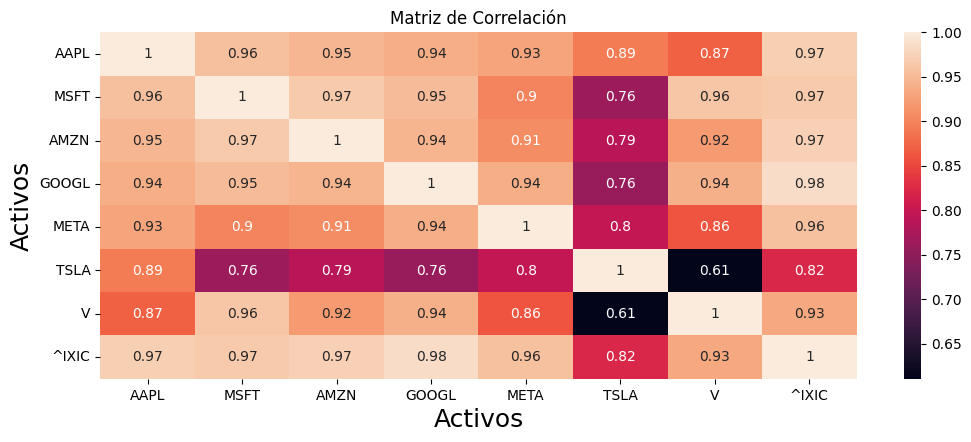

In [ ]:
correlation_mat = df.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()